## Model Selection

This notebook should include preliminary and baseline modeling.
- Try as many different models as possible.
- Don't worry about hyperparameter tuning or cross validation here.
- Ideas include:
    - linear regression
    - support vector machines
    - random forest
    - xgboost

In [92]:
# import models and fit - start with linear regression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# import the csv from 1 - EDA.ipynb

#data = pd.read_csv("/Users/thomasdoherty/Desktop/tdsf-midterm/df_linear_model.csv")
data = pd.read_csv("/Users/spencer.fargey/lighthouselabs/tdsf-midterm/df_linear_model.csv")


In [19]:
data.head(5)

,photos,price_reduced_amount,description.sold_price,description.sqft,description.baths,description.garage,description.stories,description.beds,products.brand_name,description.type_townhomes,days_listed,n_amenities,n_high_amenities,age_yrs,n_rooms
0,0,0.0,129900.0,1478.0,2.0,2.0,1.0,3.0,1,0,28,10.0,4.0,26,5.0
1,1,3000.0,88500.0,1389.0,2.0,1.0,2.0,4.0,1,0,67,1.0,1.0,79,6.0
2,0,0.0,145000.0,2058.0,2.0,0.0,1.0,3.0,1,0,28,4.0,1.0,55,5.0
3,1,9000.0,65000.0,1432.0,2.0,0.0,1.0,3.0,1,0,195,3.0,1.0,69,5.0
4,1,5000.0,169000.0,1804.0,2.0,0.0,1.0,3.0,2,0,75,3.0,1.0,40,5.0


In [93]:
# import statsmodels
import statsmodels.api as sm

# X is initialized as all columns except description.sold_price
X = data.drop('description.sold_price', axis=1)
# initialize y as description.sold_price
y = data['description.sold_price']

# add a constant to the model
X = sm.add_constant(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


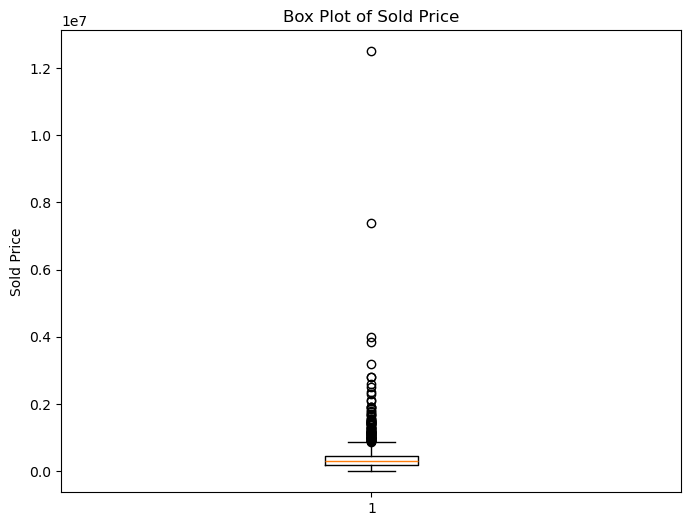

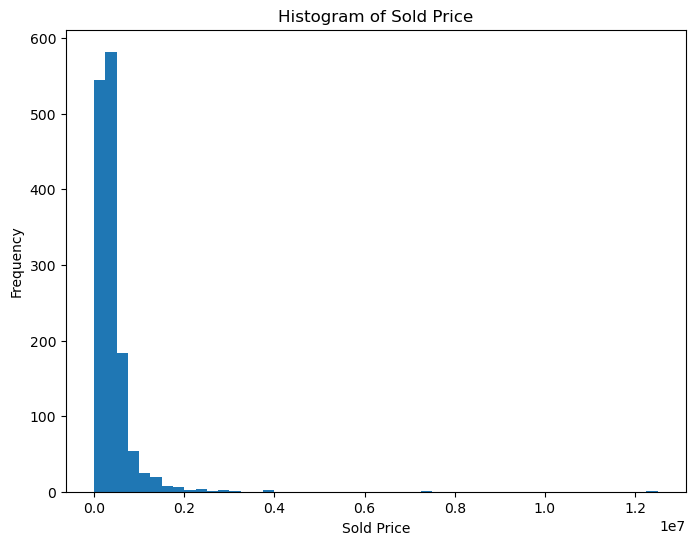

In [94]:
import matplotlib.pyplot as plt

# Box plot of the target variable 'description.sold_price'
plt.figure(figsize=(8, 6))
plt.boxplot(y)
plt.title('Box Plot of Sold Price')
plt.ylabel('Sold Price')
plt.show()

# Histogram of the target variable 'description.sold_price'
plt.figure(figsize=(8, 6))
plt.hist(y, bins=50)
plt.title('Histogram of Sold Price')
plt.xlabel('Sold Price')
plt.ylabel('Frequency')
plt.show()



In [95]:
# Train our model
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [96]:
# Check performance on train and test set
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))


print(f'Train R^2: {r2_train}\nTest R^2:  {r2_test}\n')
print(f'Train MAE: {mae_train}\nTest MAE:  {mae_test}\n')
print(f'Train MSE: {mse_train}\nTest MSE:  {mse_test}\n')
print(f'Train RMSE: {rmse_train}\nTest RMSE:  {rmse_test}')

Train R^2: 0.33768815195209956
Test R^2:  0.6437550606974555

Train MAE: 176205.76192471897
Test MAE:  174921.49685755817

Train MSE: 190696830711.1248
Test MSE:  60137297340.01592

Train RMSE: 436688.4824576036
Test RMSE:  245229.0711559621


**Separate statistical model results (below) from ML (above)**

In [23]:
# create a Python Linear Regression object
lin_reg = sm.OLS(y,X)

In [24]:
# fit the model
model = lin_reg.fit()
print_model = model.summary()
print(print_model)

                              OLS Regression Results                              
Dep. Variable:     description.sold_price   R-squared:                       0.379
Model:                                OLS   Adj. R-squared:                  0.373
Method:                     Least Squares   F-statistic:                     66.58
Date:                    Mon, 16 Sep 2024   Prob (F-statistic):          1.44e-136
Time:                            21:04:24   Log-Likelihood:                -20551.
No. Observations:                    1434   AIC:                         4.113e+04
Df Residuals:                        1420   BIC:                         4.120e+04
Df Model:                              13                                         
Covariance Type:                nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Consider what metrics you want to use to evaluate success.
- If you think about mean squared error, can we actually relate to the amount of error?
- Try root mean squared error so that error is closer to the original units (dollars)
- What does RMSE do to outliers?
- Is mean absolute error a good metric for this problem?
- What about R^2? Adjusted R^2?
- Briefly describe your reasons for picking the metrics you use

In [ ]:
# gather evaluation metrics and compare results

## Feature Selection - STRETCH

> **This step doesn't need to be part of your Minimum Viable Product (MVP), but its recommended you complete it if you have time!**

Even with all the preprocessing we did in Notebook 1, you probably still have a lot of features. Are they all important for prediction?

Investigate some feature selection algorithms (Lasso, RFE, Forward/Backward Selection)
- Perform feature selection to get a reduced subset of your original features
- Refit your models with this reduced dimensionality - how does performance change on your chosen metrics?
- Based on this, should you include feature selection in your final pipeline? Explain

Remember, feature selection often doesn't directly improve performance, but if performance remains the same, a simpler model is often preferrable. 



**RIDGE REGRESSION**

In [109]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Load the dataset
data = pd.read_csv("/Users/spencer.fargey/lighthouselabs/tdsf-midterm/df_linear_model.csv")

# X is initialized as all columns except description.sold_price
X = data.drop('description.sold_price', axis=1)
# Initialize y as description.sold_price
y = data['description.sold_price']

# Define the lower and upper percentiles for capping
lower_percentile = 0.01  # 1st percentile
upper_percentile = 0.99  # 99th percentile

# Get the values at these percentiles
lower_bound = y.quantile(lower_percentile)
upper_bound = y.quantile(upper_percentile)

# Cap the outliers in the target variable
y_capped = y.clip(lower_bound, upper_bound)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_capped, test_size=0.2, shuffle=True, random_state=44)


# Optionally, scale the features, test different scalers to see what works best
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#from sklearn.preprocessing import QuantileTransformer
#scaler = QuantileTransformer(output_distribution='normal')
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)



# Train Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Adjust alpha if needed
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_train_pred = ridge_model.predict(X_train_scaled)
y_test_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Print the results
print(f'Train R^2: {r2_train}\nTest R^2:  {r2_test}\n')
print(f'Train MAE: {mae_train}\nTest MAE:  {mae_test}\n')
print(f'Train MSE: {mse_train}\nTest MSE:  {mse_test}\n')
print(f'Train RMSE: {rmse_train}\nTest RMSE:  {rmse_test}')


Train R^2: 0.5314312908934335
Test R^2:  0.4070451135620484

Train MAE: 144302.71522187287
Test MAE:  166603.95382839933

Train MSE: 47571191200.51928
Test MSE:  60337181118.12036

Train RMSE: 218108.20984208566
Test RMSE:  245636.27809857475


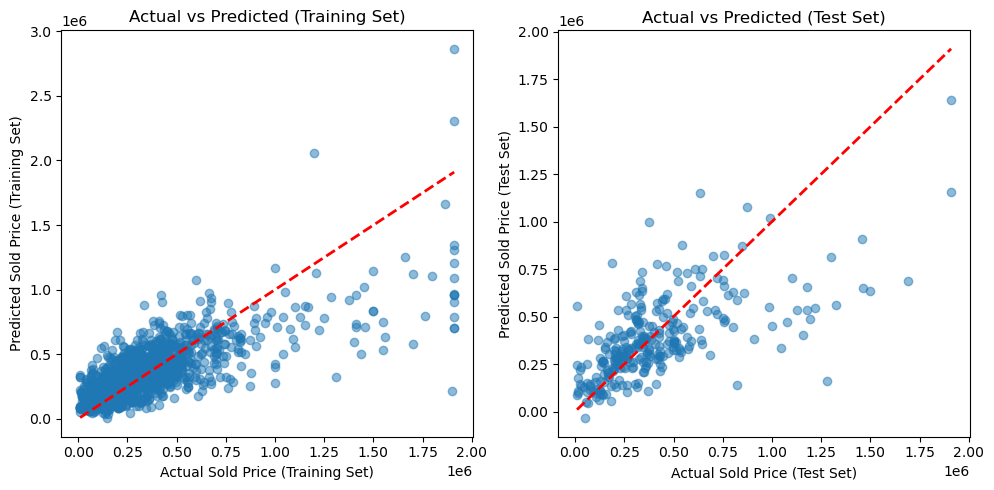

In [55]:
import matplotlib.pyplot as plt

# Visualizing the performance for the training set
plt.figure(figsize=(10, 5))

# Plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)  # Line for perfect predictions
plt.xlabel('Actual Sold Price (Training Set)')
plt.ylabel('Predicted Sold Price (Training Set)')
plt.title('Actual vs Predicted (Training Set)')

# Plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Line for perfect predictions
plt.xlabel('Actual Sold Price (Test Set)')
plt.ylabel('Predicted Sold Price (Test Set)')
plt.title('Actual vs Predicted (Test Set)')

plt.tight_layout()
plt.show()


***XG BOOST***   

In [103]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("/Users/spencer.fargey/lighthouselabs/tdsf-midterm/df_linear_model.csv")

# X is initialized as all columns except description.sold_price
X = data.drop('description.sold_price', axis=1)
y = data['description.sold_price']

# Apply percentile capping as done previously
lower_percentile = 0.01
upper_percentile = 0.99
lower_bound = y.quantile(lower_percentile)
upper_bound = y.quantile(upper_percentile)
y_capped = y.clip(lower_bound, upper_bound)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_capped, test_size=0.2, random_state=42)

# Optionally, scale the features
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

#from sklearn.preprocessing import RobustScaler
#scaler = RobustScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train the XGBoost Regressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.8, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_xgb = xgb_model.predict(X_train_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluate the model
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_pred_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_pred_xgb))

print(f'Train R^2 (XGBoost): {r2_train_xgb}')
print(f'Test R^2 (XGBoost): {r2_test_xgb}')
print(f'Train RMSE (XGBoost): {rmse_train_xgb}')
print(f'Test RMSE (XGBoost): {rmse_test_xgb}')

Train R^2 (XGBoost): 0.7622343840976136
Test R^2 (XGBoost): 0.5591833000205598
Train RMSE (XGBoost): 154763.13397661268
Test RMSE (XGBoost): 215346.98103251358


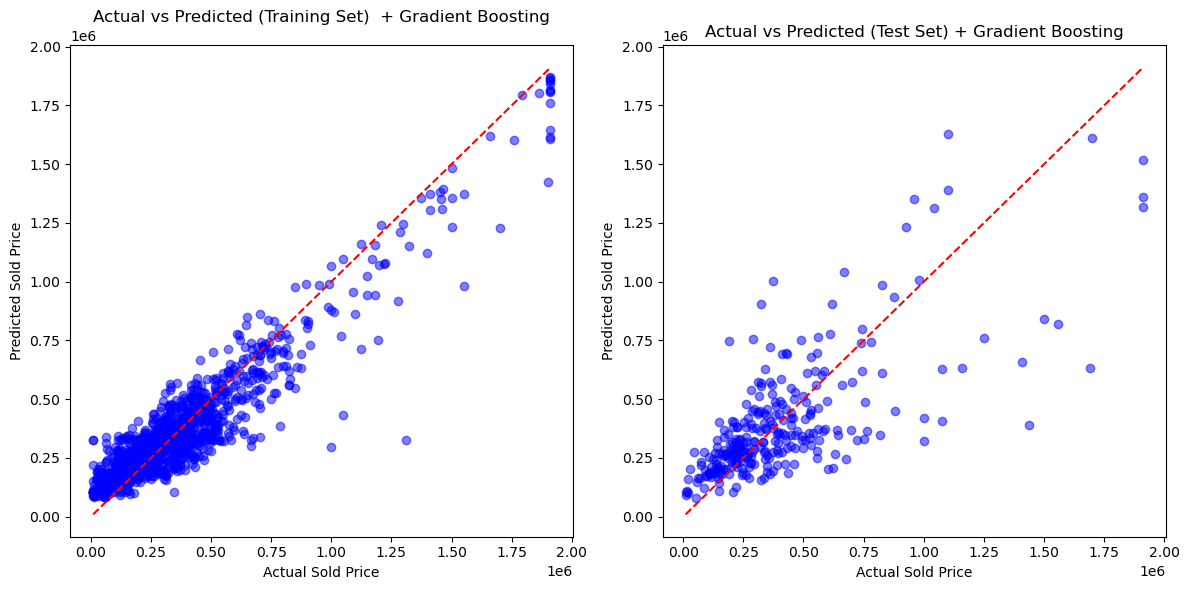

In [98]:
import matplotlib.pyplot as plt

# Plot Actual vs. Predicted for Training Set (Polynomial Features + Gradient Boosting)
plt.figure(figsize=(12, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_poly_gbr, color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')  # Reference line
plt.title('Actual vs Predicted (Training Set)  + Gradient Boosting')

plt.xlabel('Actual Sold Price')
plt.ylabel('Predicted Sold Price')

# Test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_poly_gbr, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Reference line
plt.title('Actual vs Predicted (Test Set) + Gradient Boosting')
plt.xlabel('Actual Sold Price')
plt.ylabel('Predicted Sold Price')

# Show the plot
plt.tight_layout()
plt.show()
